In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
from warnings import filterwarnings
import scikit_posthocs as sp
import statsmodels.api as sm
import pylab as py


AttributeError: module 'pandas' has no attribute 'Panel'

In [37]:
accuracy_df = pd.read_csv('/home/pedro/Documentos/WorkspaceProjetos/Heart_Attack/data/results/accuracy_measures.csv', index_col=0)
sensibility_df = pd.read_csv('/home/pedro/Documentos/WorkspaceProjetos/Heart_Attack/data/results/sensibility_measures.csv', index_col=0)
specificity_df = pd.read_csv('/home/pedro/Documentos/WorkspaceProjetos/Heart_Attack/data/results/specificity_measures.csv', index_col=0)
false_positive_rate = pd.read_csv('/home/pedro/Documentos/WorkspaceProjetos/Heart_Attack/data/results/false_positive_rate_measures.csv', index_col=0)

# Estatísticas descritivas

In [38]:
accuracy_df.describe()

,reg_logistic,knn,mlp,random_for,svm,deci_tree
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.870909,0.829091,0.970909,0.887273,0.887273,0.940000
std,0.005750,0.009389,0.012713,0.007666,0.007666,0.027172
min,0.854545,0.818182,0.945455,0.872727,0.872727,0.890909
25%,0.872727,0.818182,0.963636,0.890909,0.890909,0.927273
50%,0.872727,0.836364,0.972727,0.890909,0.890909,0.945455
75%,0.872727,0.836364,0.981818,0.890909,0.890909,0.963636
max,0.872727,0.836364,0.981818,0.890909,0.890909,0.963636


In [39]:
sensibility_df.describe()

,reg_logistic,knn,mlp,random_for,svm,deci_tree
count,1.000000e+01,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000
mean,8.461538e-01,0.726923,0.942308,8.846154e-01,8.846154e-01,0.896154
std,1.170278e-16,0.012163,0.027196,2.340556e-16,2.340556e-16,0.057478
min,8.461538e-01,0.692308,0.884615,8.846154e-01,8.846154e-01,0.769231
25%,8.461538e-01,0.730769,0.923077,8.846154e-01,8.846154e-01,0.865385
50%,8.461538e-01,0.730769,0.961538,8.846154e-01,8.846154e-01,0.923077
75%,8.461538e-01,0.730769,0.961538,8.846154e-01,8.846154e-01,0.923077
max,8.461538e-01,0.730769,0.961538,8.846154e-01,8.846154e-01,0.961538


In [40]:
specificity_df.describe()

,reg_logistic,knn,mlp,random_for,svm,deci_tree
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.893103,0.920690,0.996552,0.889655,0.889655,0.979310
std,0.010904,0.016657,0.010904,0.014539,0.014539,0.037068
min,0.862069,0.896552,0.965517,0.862069,0.862069,0.896552
25%,0.896552,0.905172,1.000000,0.896552,0.896552,0.974138
50%,0.896552,0.931034,1.000000,0.896552,0.896552,1.000000
75%,0.896552,0.931034,1.000000,0.896552,0.896552,1.000000
max,0.896552,0.931034,1.000000,0.896552,0.896552,1.000000


In [41]:
false_positive_rate.describe()

,reg_logistic,knn,mlp,random_for,svm,deci_tree
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.106897,0.079310,0.003448,0.110345,0.110345,0.020690
std,0.010904,0.016657,0.010904,0.014539,0.014539,0.037068
min,0.103448,0.068966,0.000000,0.103448,0.103448,0.000000
25%,0.103448,0.068966,0.000000,0.103448,0.103448,0.000000
50%,0.103448,0.068966,0.000000,0.103448,0.103448,0.000000
75%,0.103448,0.094828,0.000000,0.103448,0.103448,0.025862
max,0.137931,0.103448,0.034483,0.137931,0.137931,0.103448


# Testando as distribuições quando à normalidade

## Histograma 

array([[<AxesSubplot:title={'center':'reg_logistic'}>,
        <AxesSubplot:title={'center':'knn'}>],
       [<AxesSubplot:title={'center':'mlp'}>,
        <AxesSubplot:title={'center':'random_for'}>],
       [<AxesSubplot:title={'center':'svm'}>,
        <AxesSubplot:title={'center':'deci_tree'}>]], dtype=object)

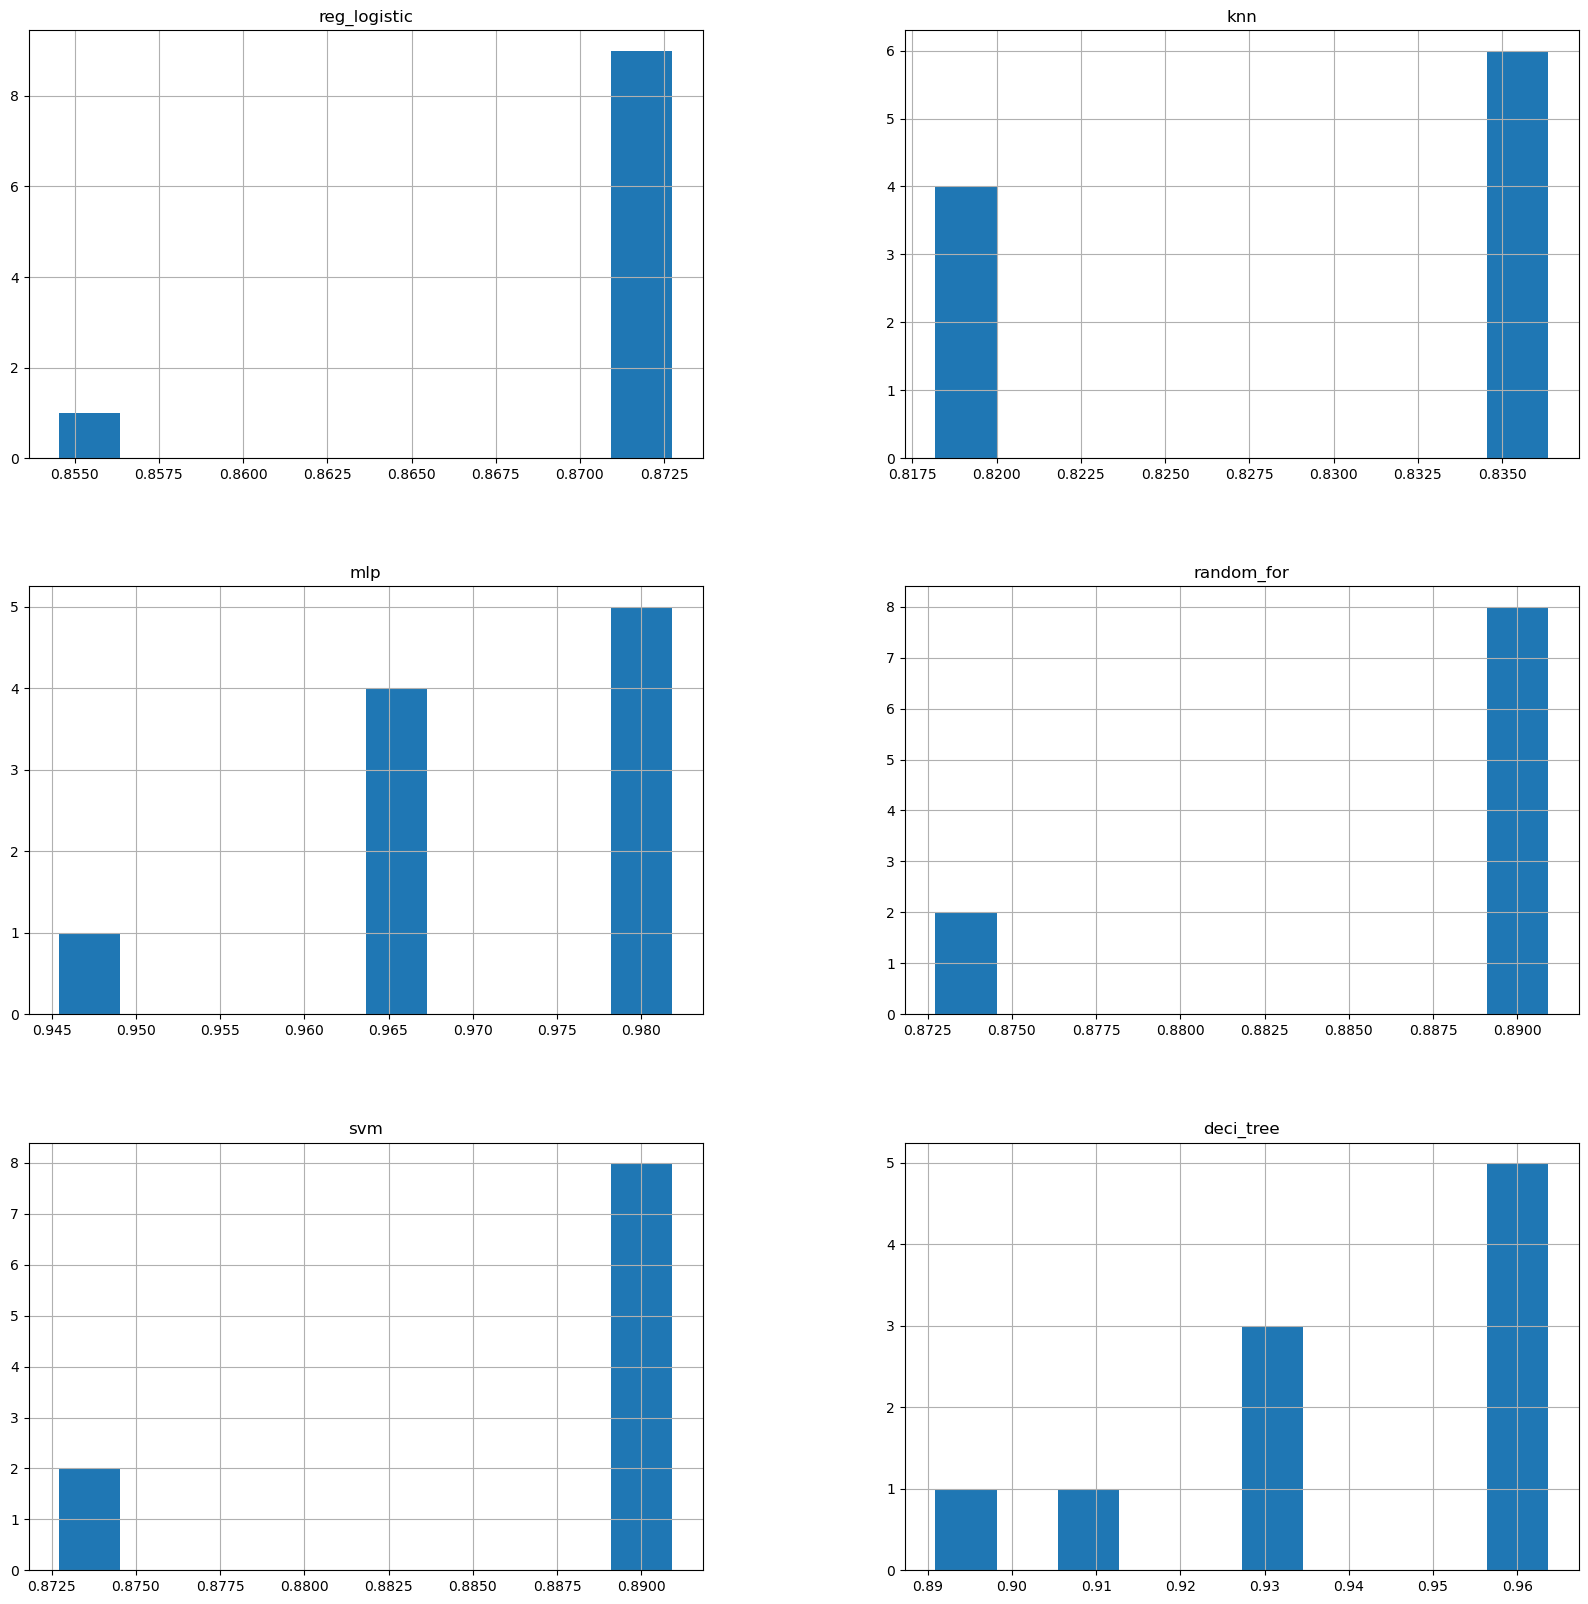

In [42]:
accuracy_df.hist(figsize=(20,20))

## Boxplot

<AxesSubplot:>

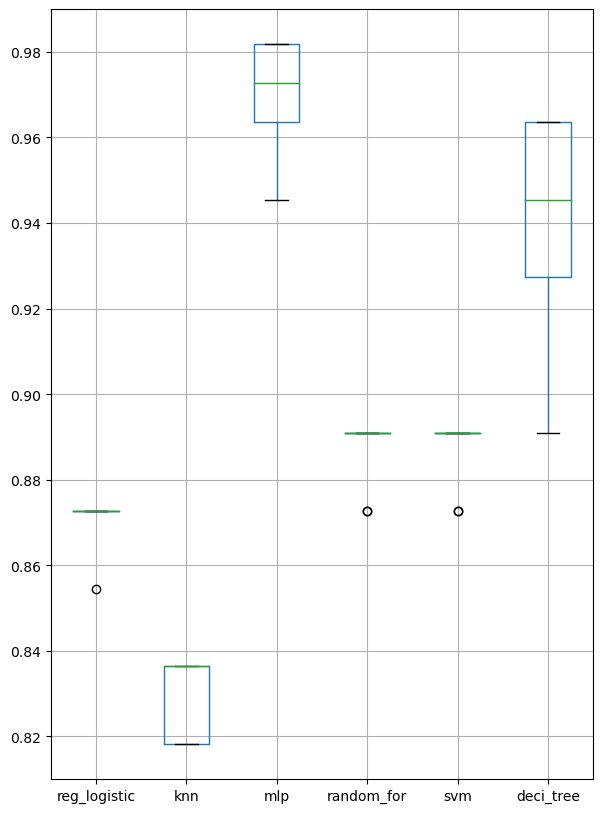

In [43]:
accuracy_df.boxplot(figsize=(7,10))

## Shapiro_Wilk

In [44]:
for col in accuracy_df.columns:
    X = accuracy_df.loc[:,col].values
    print("--"*10)
    print(f"Teste de Normalidade para {col}")
    (stat, p_value) = st.shapiro(X)
    print(f"P-value = {p_value}")
    print("--"*10)
    print("\n")

--------------------
Teste de Normalidade para reg_logistic
P-value = 1.0036932707180313e-07
--------------------


--------------------
Teste de Normalidade para knn
P-value = 0.00016867939848452806
--------------------


--------------------
Teste de Normalidade para mlp
P-value = 0.008489025756716728
--------------------


--------------------
Teste de Normalidade para random_for
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para svm
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para deci_tree
P-value = 0.01944630965590477
--------------------




array([[<AxesSubplot:title={'center':'reg_logistic'}>,
        <AxesSubplot:title={'center':'knn'}>],
       [<AxesSubplot:title={'center':'mlp'}>,
        <AxesSubplot:title={'center':'random_for'}>],
       [<AxesSubplot:title={'center':'svm'}>,
        <AxesSubplot:title={'center':'deci_tree'}>]], dtype=object)

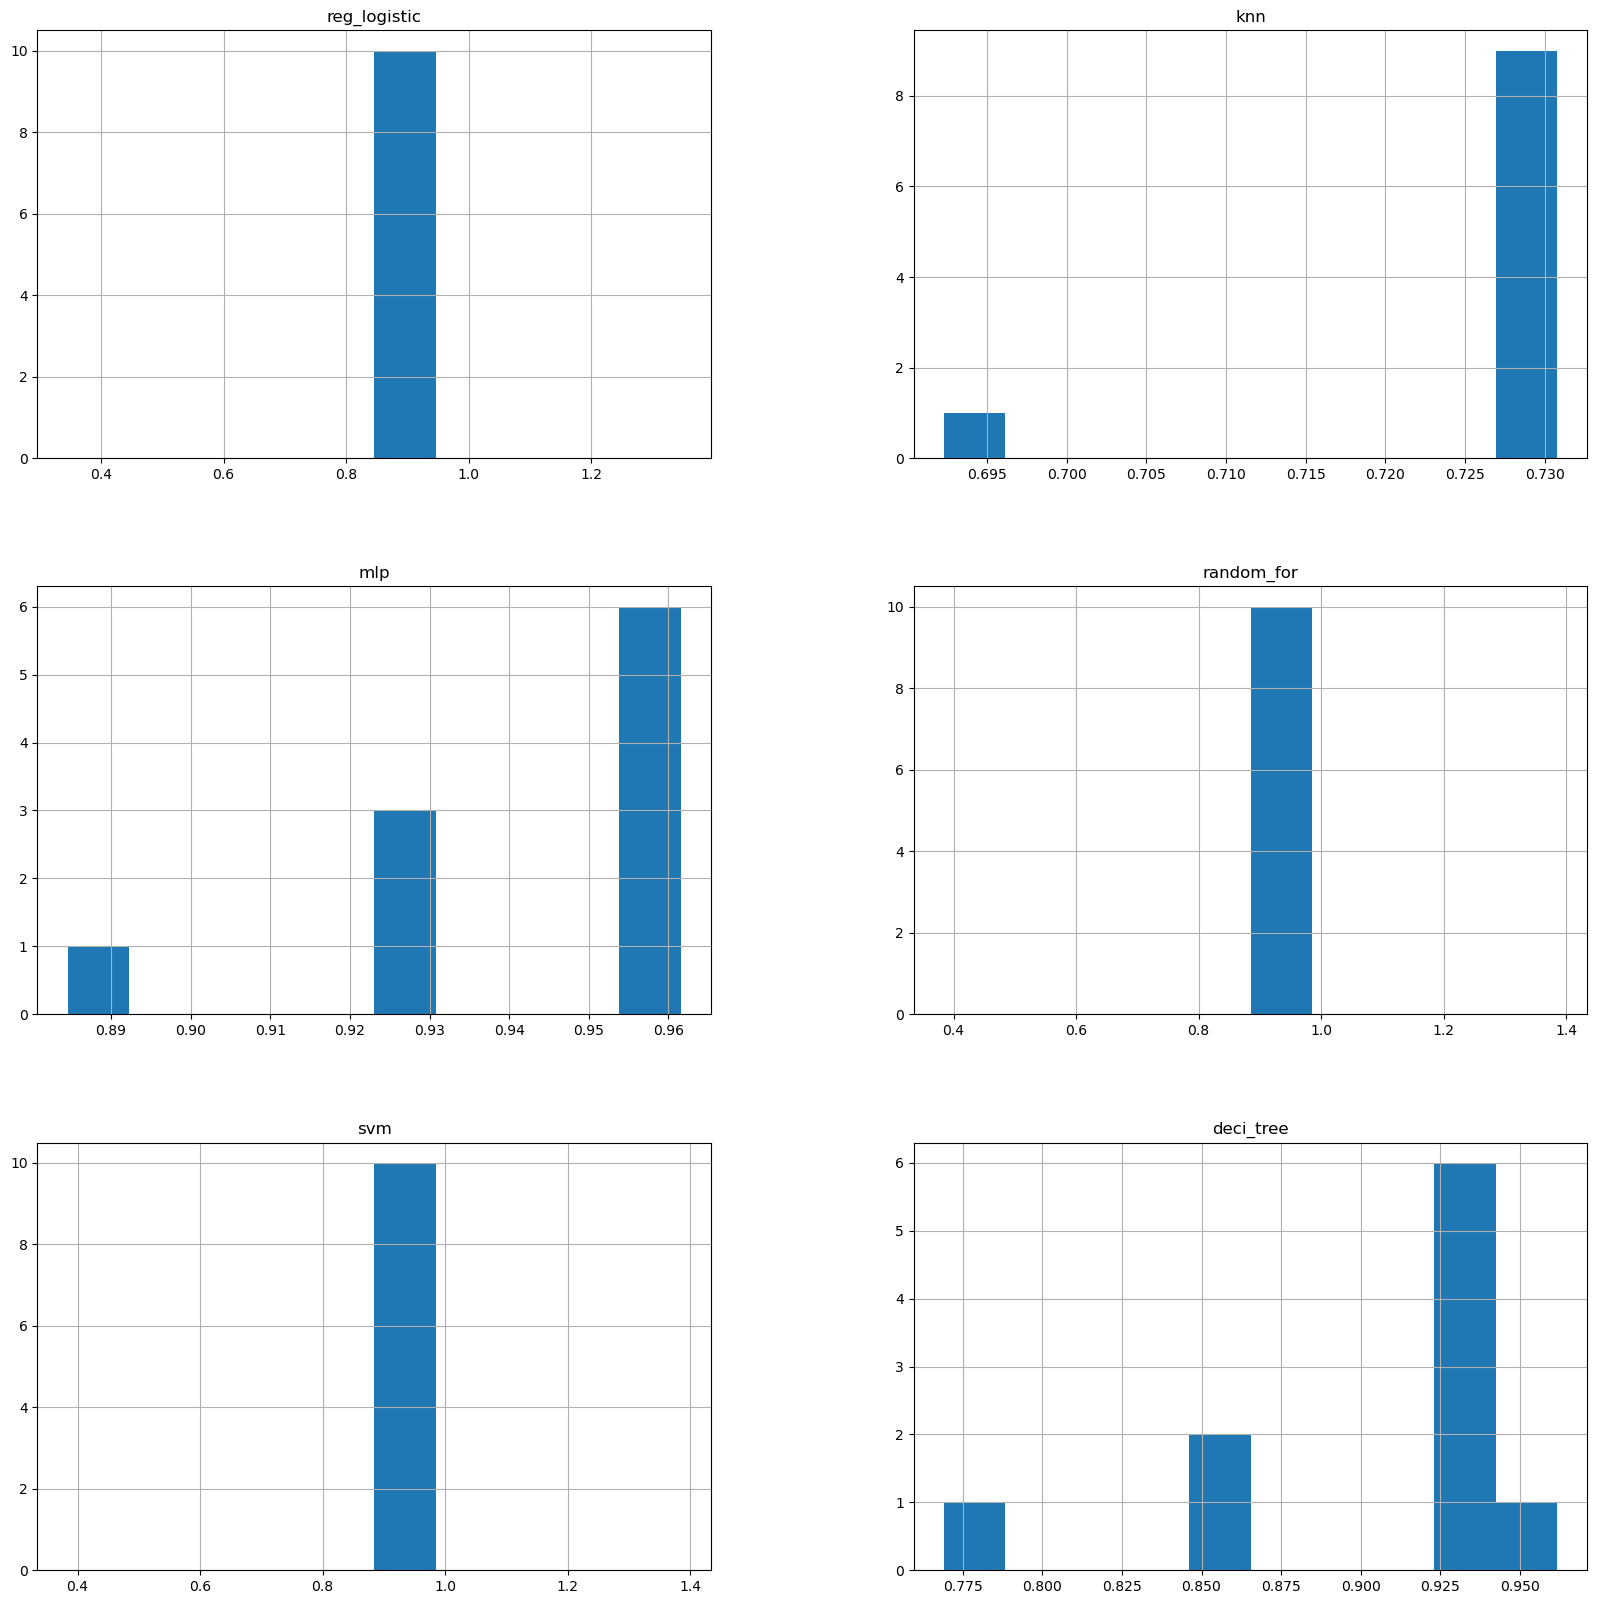

In [45]:
sensibility_df.hist(figsize=(20,20))

<AxesSubplot:>

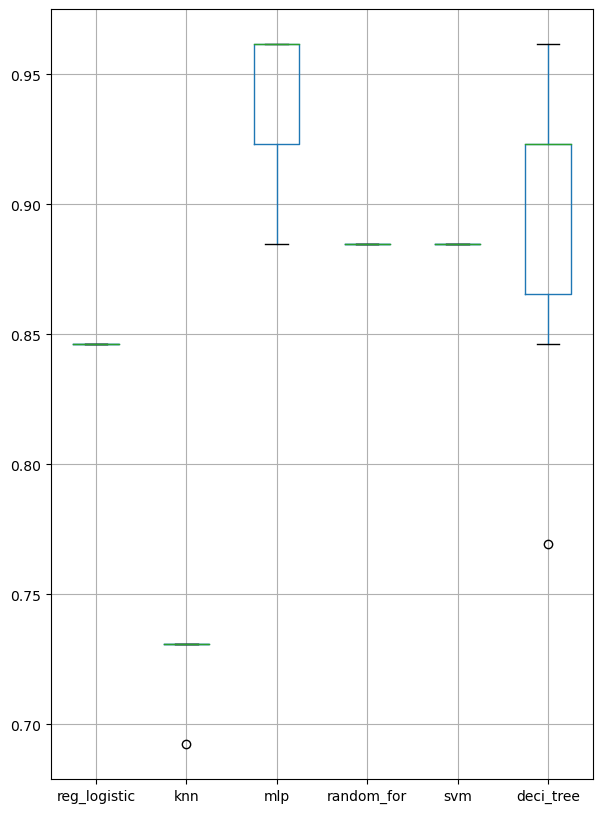

In [46]:
sensibility_df.boxplot(figsize=(7,10))

In [47]:
for col in sensibility_df.columns:
    X = accuracy_df.loc[:,col].values
    print("--"*10)
    print(f"Teste de Normalidade para {col}")
    (stat, p_value) = st.shapiro(X)
    print(f"P-value = {p_value}")
    print("--"*10)
    print("\n")

--------------------
Teste de Normalidade para reg_logistic
P-value = 1.0036932707180313e-07
--------------------


--------------------
Teste de Normalidade para knn
P-value = 0.00016867939848452806
--------------------


--------------------
Teste de Normalidade para mlp
P-value = 0.008489025756716728
--------------------


--------------------
Teste de Normalidade para random_for
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para svm
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para deci_tree
P-value = 0.01944630965590477
--------------------




array([[<AxesSubplot:title={'center':'reg_logistic'}>,
        <AxesSubplot:title={'center':'knn'}>],
       [<AxesSubplot:title={'center':'mlp'}>,
        <AxesSubplot:title={'center':'random_for'}>],
       [<AxesSubplot:title={'center':'svm'}>,
        <AxesSubplot:title={'center':'deci_tree'}>]], dtype=object)

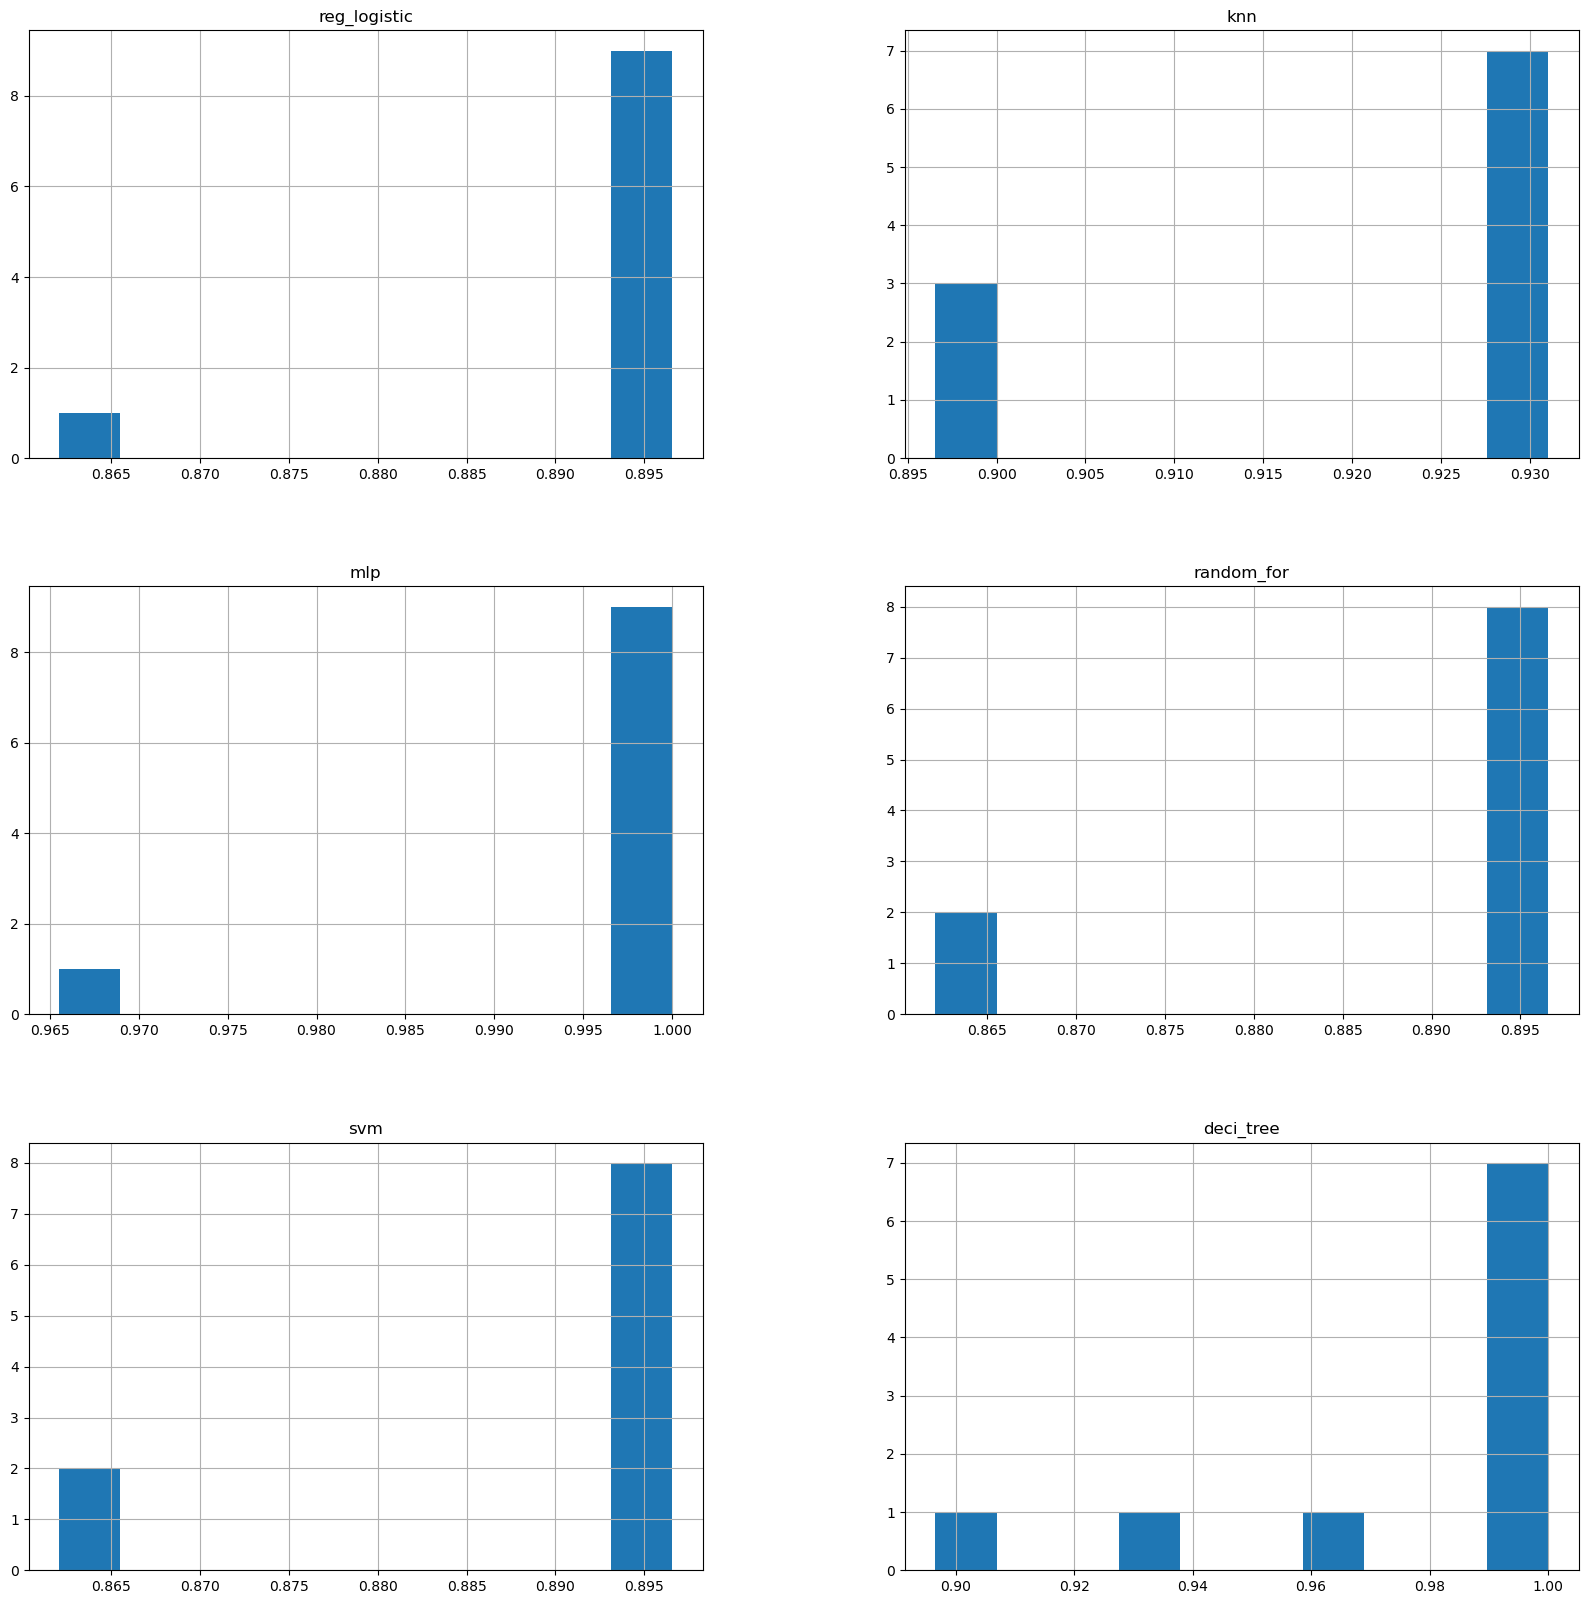

In [48]:
specificity_df.hist(figsize=(20,20))

<AxesSubplot:>

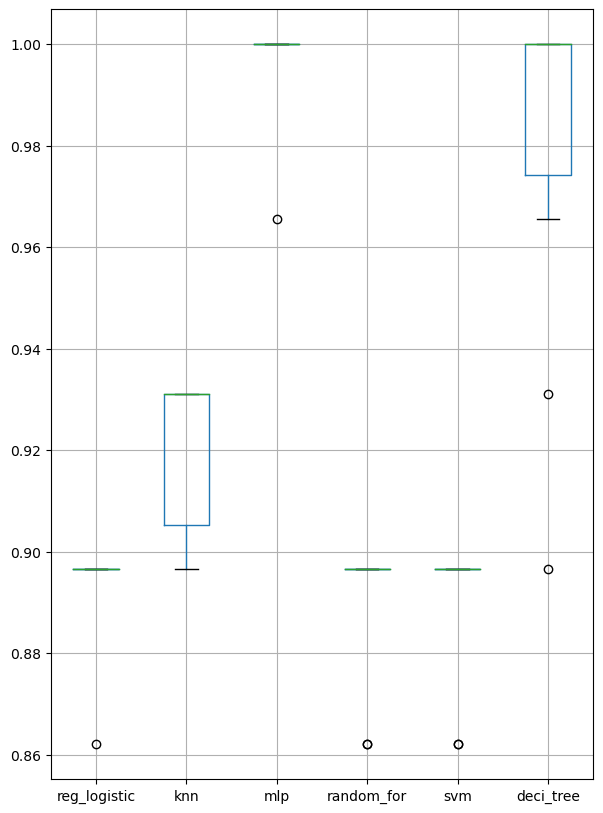

In [49]:
specificity_df.boxplot(figsize=(7,10))

In [50]:
for col in specificity_df.columns:
    X = accuracy_df.loc[:,col].values
    print("--"*10)
    print(f"Teste de Normalidade para {col}")
    (stat, p_value) = st.shapiro(X)
    print(f"P-value = {p_value}")
    print("--"*10)
    print("\n")

--------------------
Teste de Normalidade para reg_logistic
P-value = 1.0036932707180313e-07
--------------------


--------------------
Teste de Normalidade para knn
P-value = 0.00016867939848452806
--------------------


--------------------
Teste de Normalidade para mlp
P-value = 0.008489025756716728
--------------------


--------------------
Teste de Normalidade para random_for
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para svm
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para deci_tree
P-value = 0.01944630965590477
--------------------




In [51]:
for col in false_positive_rate.columns:
    X = accuracy_df.loc[:,col].values
    print("--"*10)
    print(f"Teste de Normalidade para {col}")
    (stat, p_value) = st.shapiro(X)
    print(f"P-value = {p_value}")
    print("--"*10)
    print("\n")

--------------------
Teste de Normalidade para reg_logistic
P-value = 1.0036932707180313e-07
--------------------


--------------------
Teste de Normalidade para knn
P-value = 0.00016867939848452806
--------------------


--------------------
Teste de Normalidade para mlp
P-value = 0.008489025756716728
--------------------


--------------------
Teste de Normalidade para random_for
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para svm
P-value = 4.6723621380806435e-06
--------------------


--------------------
Teste de Normalidade para deci_tree
P-value = 0.01944630965590477
--------------------




## Aplicando o teste de Kruskal-Wallis

In [52]:
# Testando se há valores Nan
print(accuracy_df.isna().any().sum())
print(sensibility_df.isna().any().sum())
print(specificity_df.isna().any().sum())
print(false_positive_rate.isna().any().sum())

0
0
0
0


In [59]:
(stat, p_value) = st.kruskal(accuracy_df.iloc[:,0].T, accuracy_df.iloc[:,1].T, accuracy_df.iloc[:,2].T, accuracy_df.iloc[:,3].T, accuracy_df.iloc[:,4].T, accuracy_df.iloc[:,5].T)
print(f"Resultado do teste de Kruskal para a acurácia = {p_value}")

(stat, p_value) = st.kruskal(sensibility_df.iloc[:,0].T, sensibility_df.iloc[:,1].T, sensibility_df.iloc[:,2].T, sensibility_df.iloc[:,3].T, sensibility_df.iloc[:,4].T, sensibility_df.iloc[:,5].T)
print(f"Resultado do teste de Kruskal para a sensibilidade = {p_value}")

(stat, p_value) = st.kruskal(accuracy_df.iloc[:,0].T, specificity_df.iloc[:,1].T, specificity_df.iloc[:,2].T, specificity_df.iloc[:,3].T, specificity_df.iloc[:,4].T, specificity_df.iloc[:,5].T)
print(f"Resultado do teste de Kruskal para a Especificidade = {p_value}")

(stat, p_value) = st.kruskal(accuracy_df.iloc[:,0].T, false_positive_rate.iloc[:,1].T, false_positive_rate.iloc[:,2].T, false_positive_rate.iloc[:,3].T, false_positive_rate.iloc[:,4].T, false_positive_rate.iloc[:,5].T)
print(f"Resultado do teste de Kruskal para a Taxa de Falso Positivos = {p_value}")

Resultado do teste de Kruskal para a acurácia = 1.6686237670124488e-10
Resultado do teste de Kruskal para a sensibilidade = 3.5115155945750403e-09
Resultado do teste de Kruskal para a Especificidade = 1.907758770448224e-09
Resultado do teste de Kruskal para a Taxa de Falso Positivos = 3.664045056654291e-10
